### proyecto de casas en israel

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #para hacer graficas
import seaborn as sns #hacer graficas
import numpy as np #metodo numericos
from scipy.stats import norm #Este es el que se utiliza para poder ver metodos estadisticos
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings 

%matplotlib inline

# Step 1 



1.   Leemos mi archivo CSV.
2.   verificamos cuales son las columnas de mis dataset.
3.   observamos si hay valores nulos dentro de mi dataset y los tipos de valores que tenemos dentro de este.



In [2]:
df=pd.read_csv('precio casas.csv',sep=';')

In [3]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [4]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [5]:
df.shape

(3479, 8)

# Step 2

1. Decidimos obversar cuales son los valores que estan nulos. 
2. Nos enfretamos a nuestra primera decisión ¿ Que hago con los valores nulos, los promedio, los elimino o elimino la columna?


In [10]:
df[pd.isnull(df["Address"])==True].head(3)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
43,60,2,True,True,True,NaN,2.650000e+09,88333.33
662,85,2,True,True,True,NaN,1.955000e+09,65166.67
706,117,2,True,True,True,NaN,6.500000e+09,216666.67


Vemos que son valores de dirección que de cierta forma nos pueden aportar valor a nuestro EDA por que observaremos por dirección los precios de las casas. sin embargo, para objeto de nuestro EDA vamos a elminar estos datos para ver la distribución por Addrees.

In [7]:
idx=df[pd.isnull(df["Address"])==True].index.tolist()

In [8]:
df1=df.drop(index=idx)

In [9]:
df1.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

En este apartado vamos agregar columnas que nos permitan tener una mejor lectura de la variables booleanas

In [52]:
df1["Park"]=df1["Parking"].map({True:"YES",False:"NO"})
df1["Ware"]=df1["Warehouse"].map({True:"YES",False:"NO"})
df1["Ele"]=df1["Elevator"].map({True:"YES",False:"NO"})

# Step 3



1.   Vamos a ver los tipos de distribución, presentes en nuestro datos numericos
2.   Vamor a ver la contabilización de nuestras variables Categoricas
3.   vamos a ver las correlaciones presentes en mis datos.



In [111]:
figure ,ax = plt.subplots(2,3,figsize=(20,10),dpi=1000)
plt.style.use("seaborn")
figure.suptitle("Distribución de los valores numericos")
ax[0,0].hist(x=df1["Area"])
ax[0,1].hist(x=df1["Room"])
ax[0,2].hist(x=df1["Price(USD)"])
ax[1,0]=sns.countplot(data=df1,x=df1["Park"],ax=ax[1,0],palette="tab10")
ax[1,1]=sns.countplot(data=df1,x=df1["Ware"],ax=ax[1,1],palette="rocket")
ax[1,2]=sns.countplot(data=df1,x=df1["Ele"],ax=ax[1,2],palette="tab10")
ax[1,0].set_ylim(0,4000)
ax[1,1].set_ylim(0,4000)
ax[1,2].set_ylim(0,4000)
ax[0,0].set_xlabel("Area")
ax[0,1].set_xlabel("Rooms")
ax[0,2].set_xlabel("Prices (USD)");


In [119]:
df1.describe().round(0)


,Area,Room,Price,Price(USD)
count,3456.0,3456.0,3.456000e+03,3456.0
mean,107.0,2.0,5.379957e+09,179332.0
std,70.0,1.0,8.121729e+09,270724.0
min,1.0,0.0,3.600000e+06,120.0
25%,69.0,2.0,1.420000e+09,47333.0
50%,90.0,2.0,2.900000e+09,96667.0
75%,120.0,2.0,6.000000e+09,200000.0
max,929.0,5.0,9.240000e+10,3080000.0


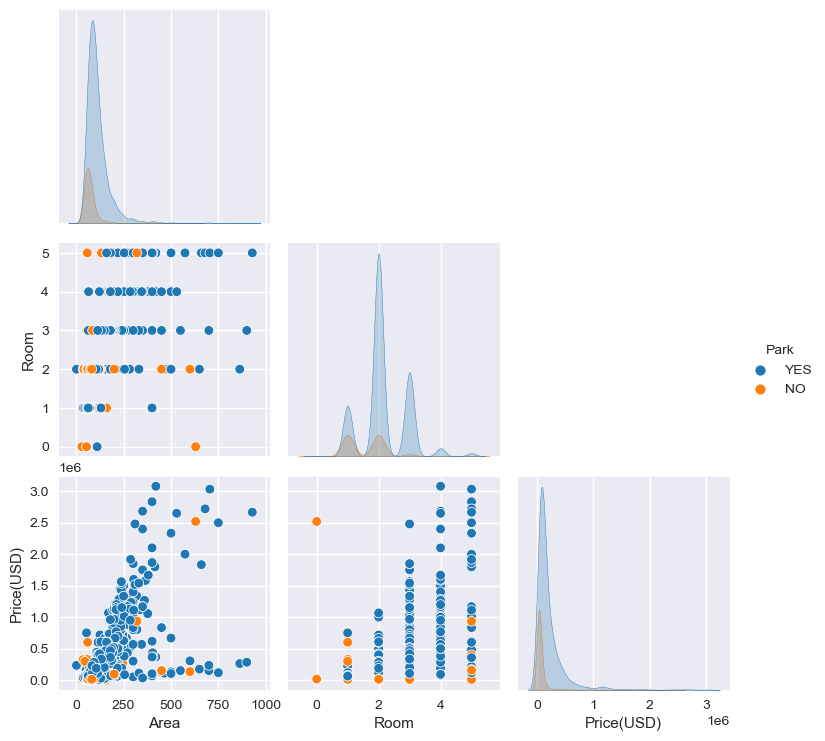

In [142]:
sns.pairplot(df1,x_vars=["Area","Room","Price(USD)"],y_vars=["Area","Room","Price(USD)"],palette="tab10",hue="Park",corner=True)

In [143]:
df_corr=df1.corr()

<AxesSubplot:>

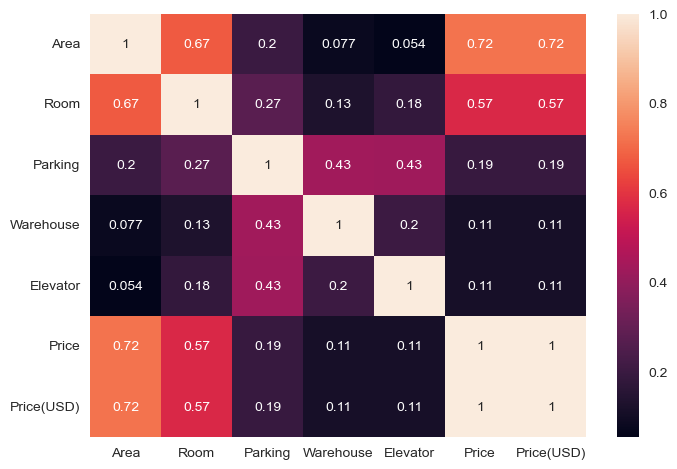

In [147]:
sns.heatmap(df_corr,annot=True)

In [ ]:
df.shape

(3479, 8)

In [ ]:
df2=df.sort_values('Area')

In [ ]:
df2

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
807,1,2,True,True,False,Damavand,7.000000e+09,233333.33
3211,30,0,False,True,False,Ostad Moein,5.000000e+08,16666.67
2321,32,1,False,True,False,Hashemi,6.100000e+08,20333.33
2324,32,1,False,True,True,Eskandari,9.400000e+08,31333.33
2783,33,1,False,True,False,Beryanak,5.600000e+08,18666.67
...,...,...,...,...,...,...,...,...
3115,750,5,True,True,False,Varamin - Beheshti,3.500000e+09,116666.67
831,750,5,True,True,True,Mahmoudieh,7.500000e+10,2500000.00
573,863,2,True,True,True,Gheitarieh,7.830000e+09,261000.00
1974,900,3,True,True,False,Damavand,8.500000e+09,283333.33


Text(0.5, 1.0, 'Precio de casas de tehran')

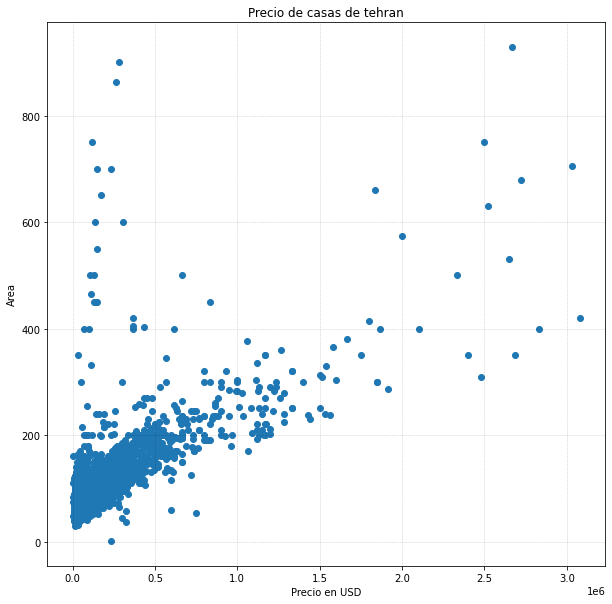

In [ ]:
fig , ax= plt.subplots(figsize=(10,10))
plt.grid(visible=True,alpha=0.2,ls='--',lw=0.5,color='k')
ax.scatter(df2['Price(USD)'],df2['Area'])
plt.ylabel("Area")
plt.xlabel("Precio en USD")
plt.title("Precio de casas de tehran")

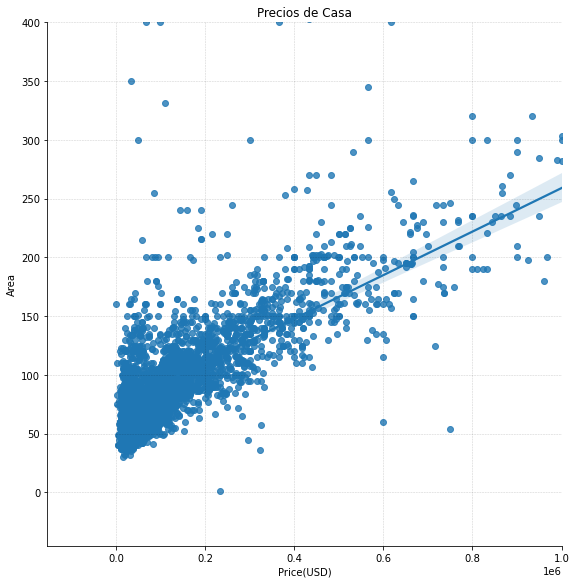

In [ ]:
f=sns.lmplot(data=df2,x="Price(USD)",y="Area",height=8,palette="pastel")
plt.title("Precios de Casa")
plt.grid(visible=True,alpha=0.2,ls='--',lw=0.5,color='k')
plt.axis(ymax=400,xmax=1000000)
plt.show()

In [ ]:
df3=pd.concat([df2["Area"],df2["Room"],df2["Price(USD)"]],axis=1)

In [ ]:
df3.head(10)

,Area,Room,Price(USD)
807,1,2,233333.33
3211,30,0,16666.67
2321,32,1,20333.33
2324,32,1,31333.33
2783,33,1,18666.67
2307,35,1,22000.00
3232,35,1,26000.00
3068,35,1,33000.00
2171,36,2,324000.00
2855,37,1,31666.67


In [ ]:
corre=df3.corr()

NameError: ignored

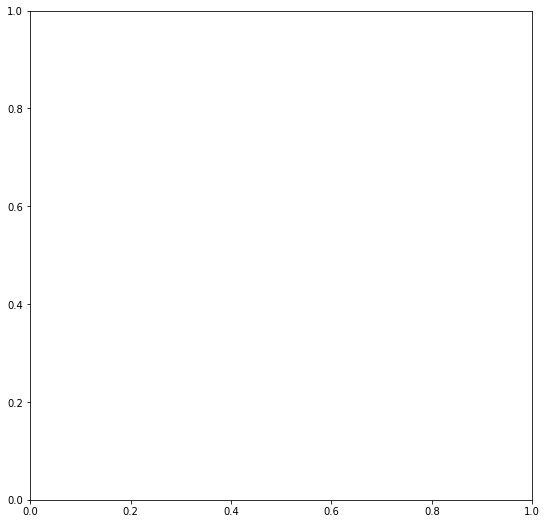

In [ ]:
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corre, vmax=0.8,square=True,annot=True)

##### En este caso nos damos cuenta que las relaciones mas importantes para las casa de teheran son las de area y precio, y menor medida la cantidad de rooms con la cantidad de area